In [3]:
#load pip libraries
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import skmultiflow as sci_flow
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.evaluation import EvaluatePrequential
from datetime import datetime
import time
import os

#load custom libraries
from funcs.IoTDevice import IoTDevice
import funcs.generate_state_data as generate_state_data

In [4]:

json_folder_path = "../json_folder/device_info"
synth_device_config = "../json_folder/synth_device_gen.json"

# load the amount of devices to be generated
with open(synth_device_config, 'r') as file:
    device_count = json.load(file)


dfs_dict = {}
combined_df_dict = {}

for filename in os.listdir(json_folder_path):
    if filename.endswith(".json") and "template" not in filename.lower():
        json_path = os.path.join(json_folder_path, filename)
        print(f"Loading JSON file: {json_path}")
        
        device = IoTDevice()
        device.load_json(json_path)
        device_name = device.get_device_attribute("topic")


        gen_number = device_count.get(filename, 1)
        #print(device_name, filename, gen_number) #debug

        for i in range(gen_number):
            synth_id = f"{device_name}_{i}"
            dfs, combined_df = generate_state_data.device_data_generation(device)

            dfs_dict[synth_id] = dfs
            combined_df_dict[synth_id] = combined_df

print(list(dfs_dict.keys()))
print(list(combined_df_dict.keys()))

# #single device testing
# test_temp_device = IoTDevice()
# test_json_path = "../json_folder/config_template.json"
# test_temp_device.load_json(test_json_path)
# run_state = test_temp_device.get_synthesis_parameter("mode")
# dfs, combined_df = generate_state_data.device_data_generation(test_temp_device)




Loading JSON file: ../json_folder/device_info\bale_counter_config.json
Loading JSON file: ../json_folder/device_info\hatch_status_config.json
Loading JSON file: ../json_folder/device_info\motor_monitor_config.json
Loading JSON file: ../json_folder/device_info\output_sensor_config.json
Loading JSON file: ../json_folder/device_info\temperature_config.json
['factory/line1/device456/baleCounter_0', 'factory/line1/device999/hatchSensor_0', 'factory/line1/device001/motorMonitor_0', 'factory/line1/device001/motorMonitor_1', 'factory/line1/device001/motorMonitor_2', 'factory/line1/device001/motorMonitor_3', 'factory/line1/device001/motorMonitor_4', 'factory/line1/device456/outputSensor_0', 'factory/line1/device123/temperatureSensor_0']
['factory/line1/device456/baleCounter_0', 'factory/line1/device999/hatchSensor_0', 'factory/line1/device001/motorMonitor_0', 'factory/line1/device001/motorMonitor_1', 'factory/line1/device001/motorMonitor_2', 'factory/line1/device001/motorMonitor_3', 'factory/li

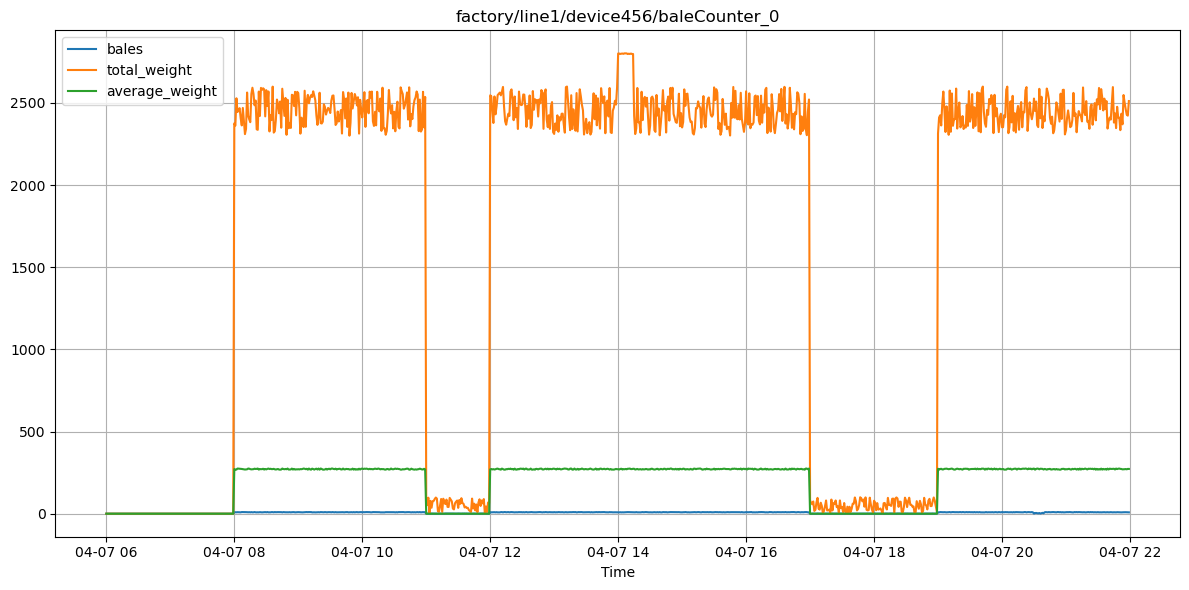

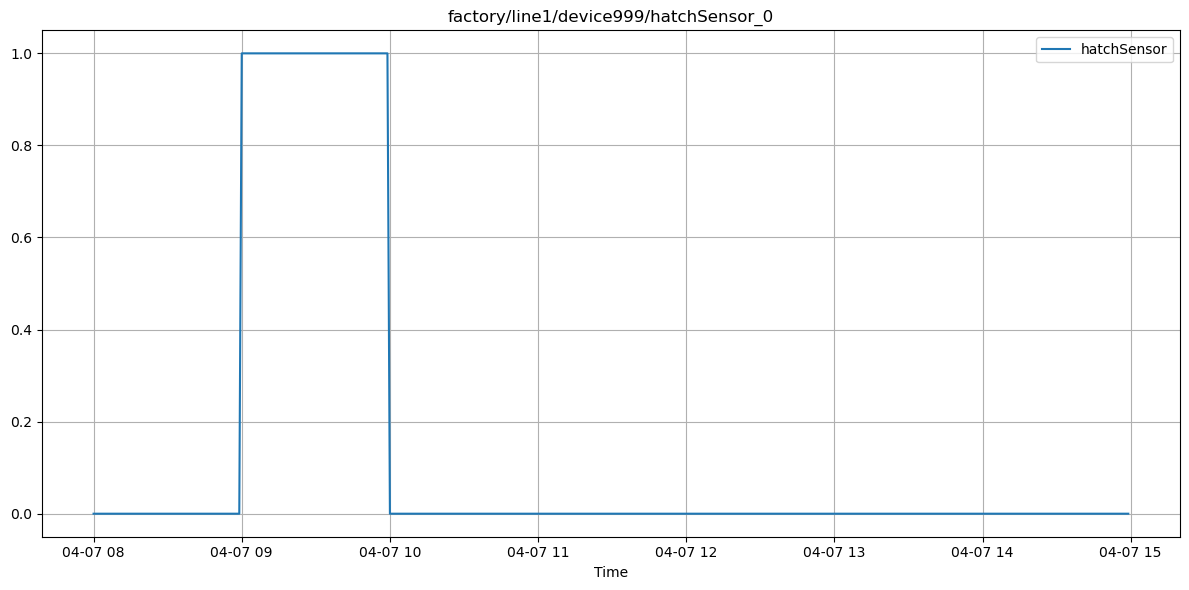

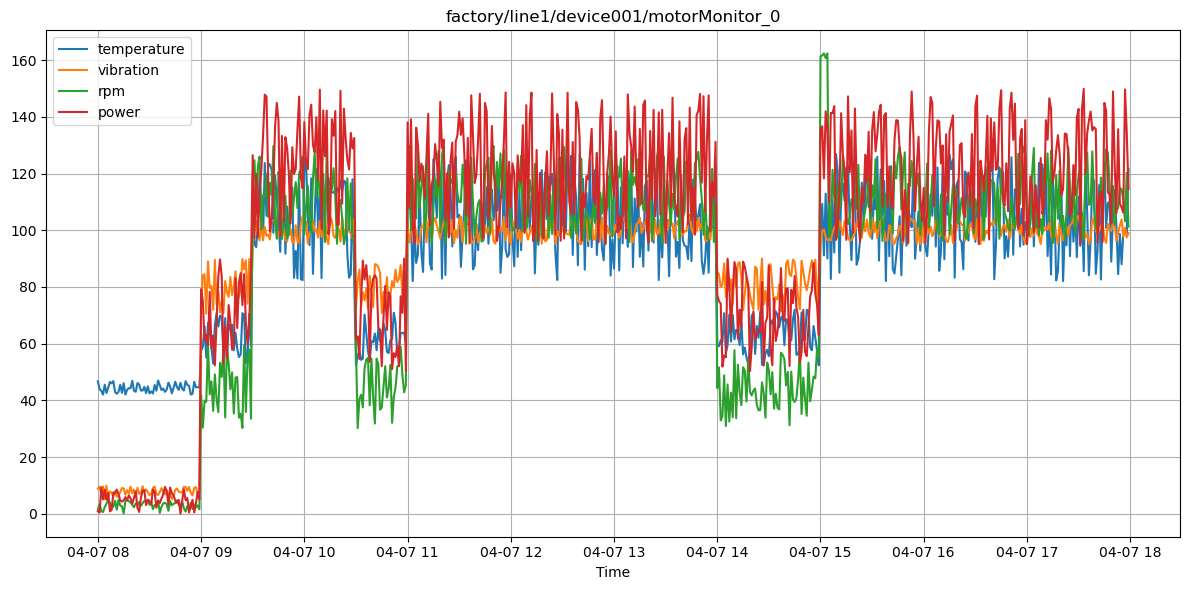

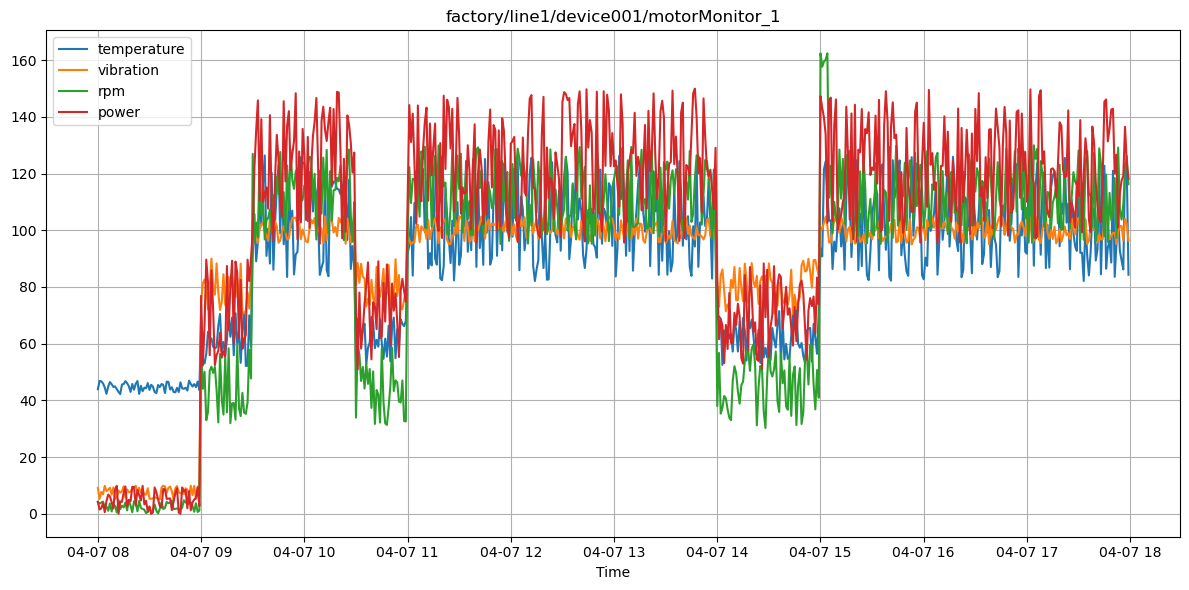

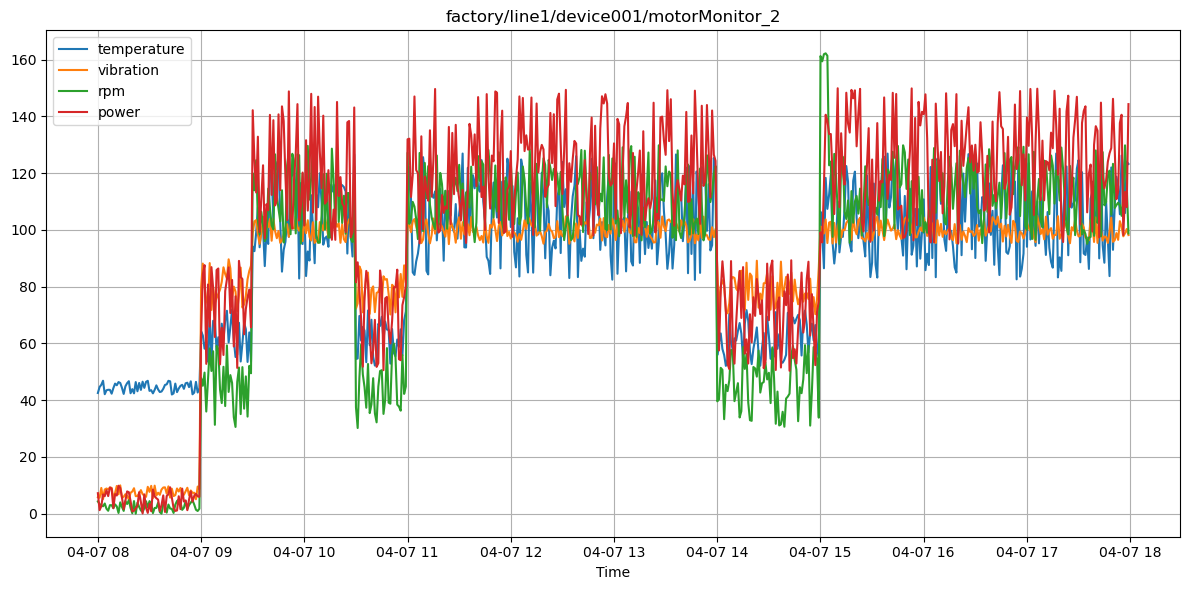

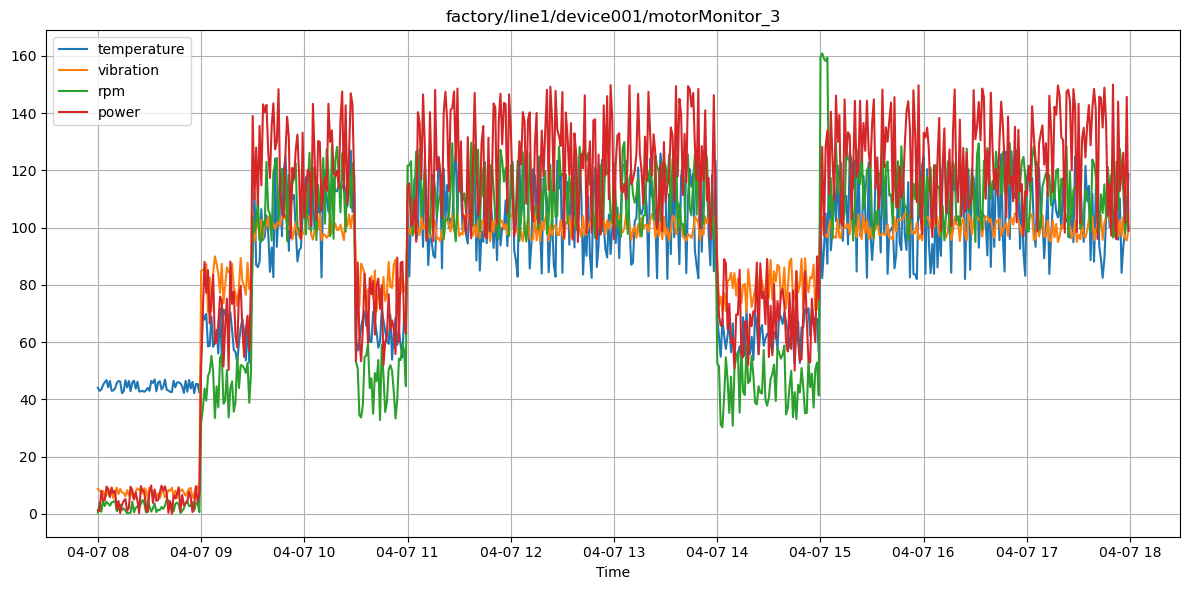

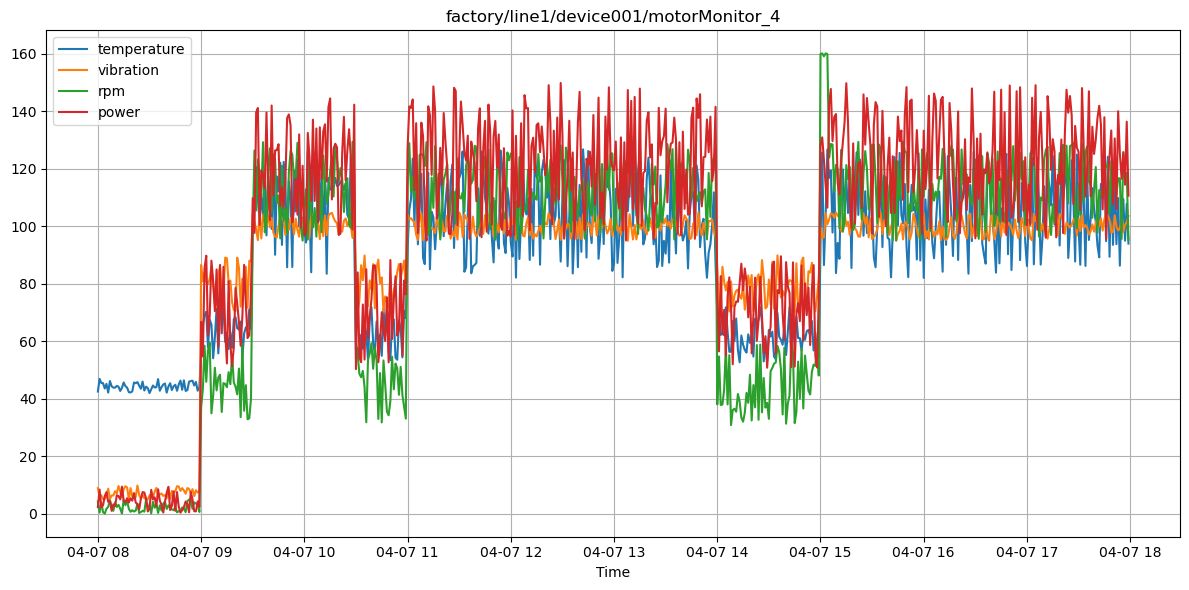

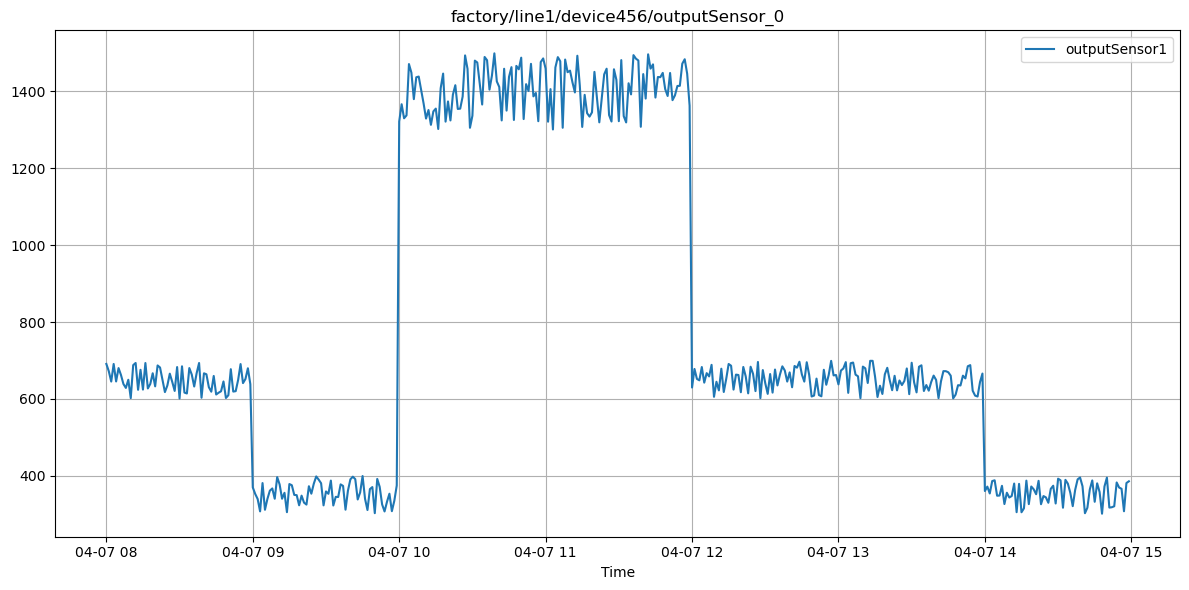

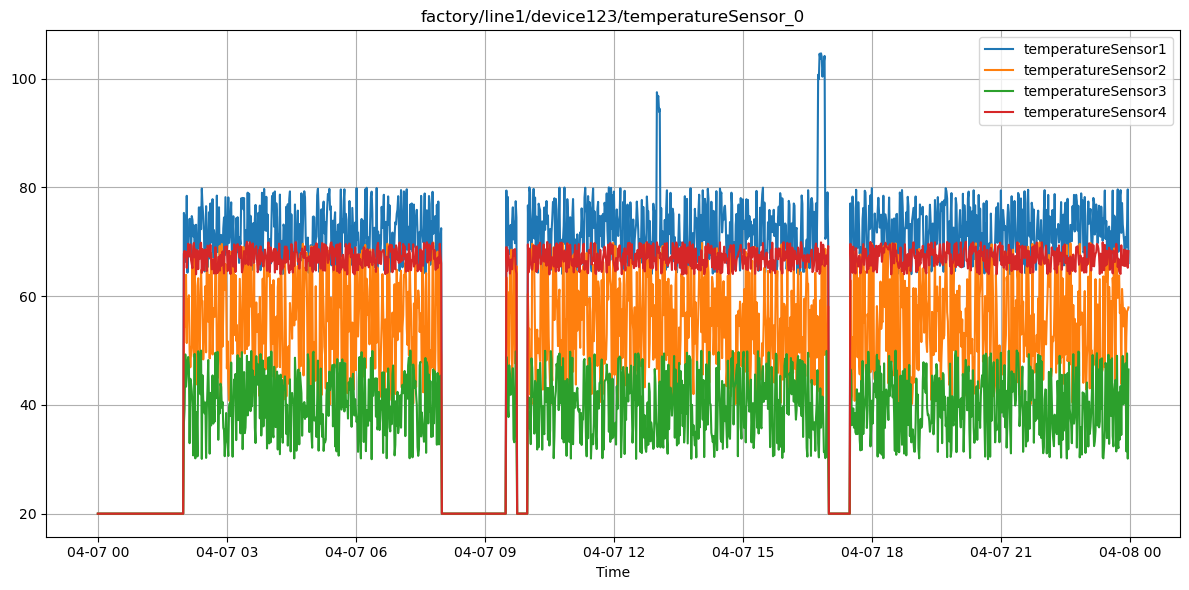

In [ ]:
#for switching between batch and stream mode, change the "mode" under "synth_detial" in the json file

test_mode = "stream"  # or "stream"

# the batch mode
if (test_mode == "batch"):
    for key in dfs_dict:
        dfs = dfs_dict[key]
        combined_df = combined_df_dict[key]

        # Create plot
        plt.figure(figsize=(12, 6))
        for df in dfs:
            sensor_name = df["sensor"].iloc[0] if "sensor" in df.columns else "Unknown Sensor"
            plt.plot(df['timestamp'].to_numpy(), df['feature_0'].to_numpy(), label=sensor_name)

        plt.title(f"{key}")
        plt.xlabel("Time")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# the stream mode
# will send the data one at a time
elif (test_mode == "stream"):
    global_stream_length = min(
        min(len(df) for df in dfs_list) for dfs_list in dfs_dict.values()
    )

    for i in range(global_stream_length):
        print(f"\n⏱Time step {i + 1}")

        for key, dfs_list in dfs_dict.items():
            for sensor_df in dfs_list:
                row_data = sensor_df.iloc[i].to_dict()
                print(f"[{key}] {row_data}")

        time.sleep(1)  # Simulate real-time streaming